# Simple Linear Regression

In [5]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['figure.figsize'] = (5, 5)

---
## Some linearly correlated data (x, y)

## <font color=blue>Learning Objectives:</font>
1. You will be able to simulate linearly correlated data.
2. You will understand the use of np.random.seed - i.e. to set the subsequent sequence of pseudo random values.

In [75]:
n = 100
np.random.seed(0)  # So we all get the exact same random numbers for x and y below
x = np.random.randn(n)
y = 0.8 * x + np.random.randn(n)

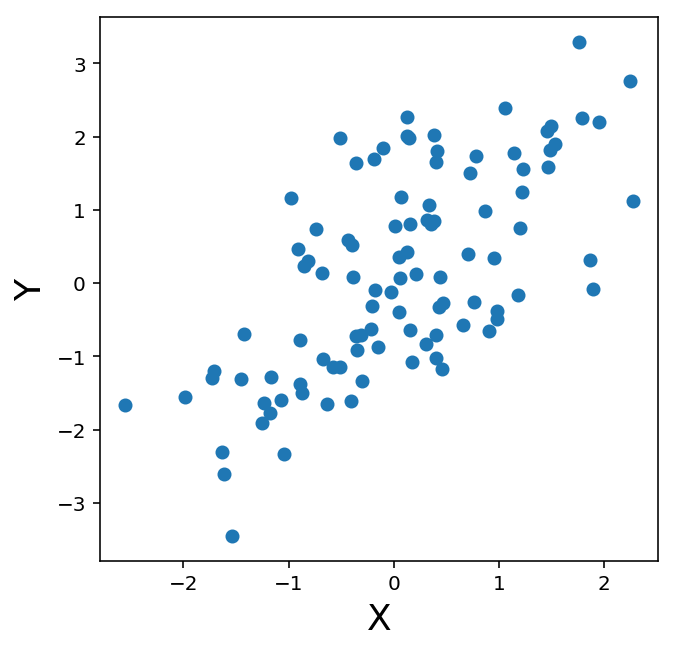

In [10]:
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y');

---
## Covariance and Correlation between x and y

## <font color=blue>Learning Objectives:</font>
1. You will be able to compute the covariance and correlation between two random variables.

In [11]:
cov = np.cov(x, y)
cor = np.corrcoef(x, y)

print(cov)
print()
print(cor)

[[1.02608749 0.93856062]
 [0.93856062 1.92635029]]

[[1.         0.66757875]
 [0.66757875 1.        ]]


In [12]:
import pandas as pd
pd.DataFrame(cov, index=['x', 'y'], columns=['x', 'y'])

,x,y
x,1.026087,0.938561
y,0.938561,1.926350


In [13]:
pd.DataFrame(cor, index=['x', 'y'], columns=['x', 'y'])

,x,y
x,1.000000,0.667579
y,0.667579,1.000000


---
## Ordinary Least Squares (OLS) Linear Regression

Here are a few different modules for performing OLS linear regression.

## <font color=blue>Learning Objectives:</font>
1. You will be able to use several different modules to perform OLS linear regression with and without a constant.

---
## OLS with NumPy for $y = \beta_1 x$

In [57]:
x[:9]

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885])

In [76]:
x = x.reshape((-1, 1))  # column vector

x[:9]

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788],
       [ 0.95008842],
       [-0.15135721],
       [-0.10321885]])

In [77]:
beta, res, rank, sing = np.linalg.lstsq(x, y, rcond=None)
print(beta) # slope
print(res) # residuals sum of squared errors

[0.91910764]
[106.28000221]


---
## Plot data overlaid with OLS fit from above.

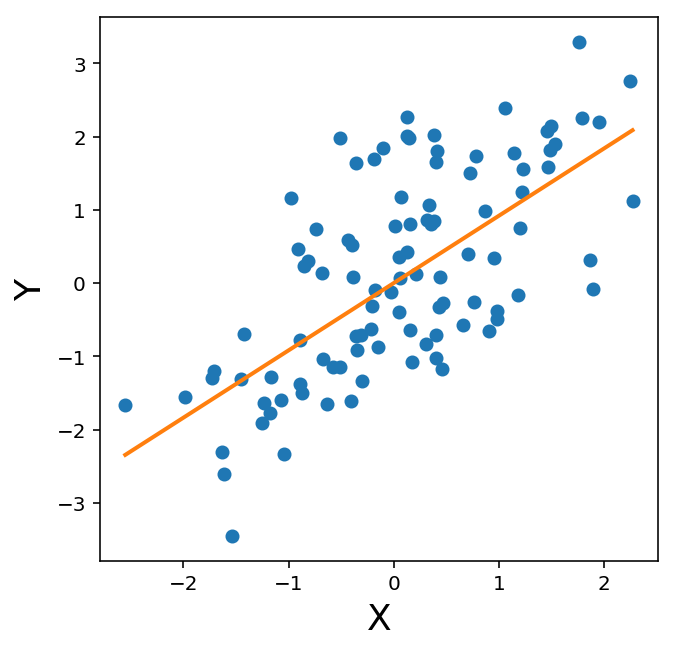

In [78]:
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')

xfit = np.linspace(x.min(), x.max(), 100)
yfit = beta * xfit
plt.plot(xfit, yfit, lw=2);

---
## OLS with NumPy for $y = \beta_0 + \beta_1 x$.

In [79]:
X = np.hstack([np.ones(x.shape), x])
X[:9,:]

array([[ 1.        ,  1.76405235],
       [ 1.        ,  0.40015721],
       [ 1.        ,  0.97873798],
       [ 1.        ,  2.2408932 ],
       [ 1.        ,  1.86755799],
       [ 1.        , -0.97727788],
       [ 1.        ,  0.95008842],
       [ 1.        , -0.15135721],
       [ 1.        , -0.10321885]])

In [80]:
beta, res, rank, sing = np.linalg.lstsq(X, y, rcond=None)
print(beta) # [y-intercept, slope] <-- same order as columns of X
print(res) # residuals sum of squared errors

[0.07515309 0.91469843]
[105.71718542]


## <font color=red>Exercises</font>

1. Plot the data overlaid with the OLS fit from above.

---
## OLS with StatsModels for $y = \beta_1 x$.

In [81]:
import statsmodels.api as sm

model = sm.OLS(y, x)  # <-- x,y must be column vectors
results = model.fit()

print(results.params)  # slope
results.summary()

[0.91910764]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.448
Model:                            OLS   Adj. R-squared (uncentered):              0.442
Method:                 Least Squares   F-statistic:                              80.22
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                    2.06e-14
Time:                        10:09:52   Log-Likelihood:                         -144.94
No. Observations:                 100   AIC:                                      291.9
Df Residuals:                      99   BIC:                                      294.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9191      0.103      8.956      0.000       0.715       1.123
==============================================================================
Omnibus:                        5.116   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                2.979
Skew:                           0.209   Prob(JB):                        0.226
Kurtosis:                       2.265   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
## OLS with StatsModels for $y = \beta_0 + \beta_1 x$.

In [82]:
X = sm.add_constant(x)
X[:9,:]

array([[ 1.        ,  1.76405235],
       [ 1.        ,  0.40015721],
       [ 1.        ,  0.97873798],
       [ 1.        ,  2.2408932 ],
       [ 1.        ,  1.86755799],
       [ 1.        , -0.97727788],
       [ 1.        ,  0.95008842],
       [ 1.        , -0.15135721],
       [ 1.        , -0.10321885]])

In [83]:
model = sm.OLS(y, X)  # <-- x,y must be column vectors
results = model.fit()

print(results.params)  # [y-intercept, slope] <-- same order as columns of X
results.summary()

[0.07515309 0.91469843]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     78.79
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           3.31e-14
Time:                        10:09:54   Log-Likelihood:                -144.67
No. Observations:                 100   AIC:                             293.3
Df Residuals:                      98   BIC:                             298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0752      0.104      0.722      0.472      -0.131       0.282
x1             0.9147      0.103      8.876      0.000       0.710       1.119
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.000
Skew:                           0.210   Prob(JB):                        0.223
Kurtosis:                       2.262   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
## OLS with scikit-learn for $y = \beta_1 x$.

In [84]:
from sklearn.linear_model import LinearRegression

olsmodel = LinearRegression(fit_intercept=False)
olsmodel.fit(x, y)

print(olsmodel.intercept_)  # y-intercept
print(olsmodel.coef_)  # slope

0.0
[0.91910764]


---
## OLS with scikit-learn for $y = \beta_0 + \beta_1 x$.

In [85]:
olsmodel = LinearRegression(fit_intercept=True)
olsmodel.fit(x, y)

print(olsmodel.intercept_)  # y-intercept
print(olsmodel.coef_)  # slope

0.07515308505251429
[0.91469843]


---
## Plot data overlaid with OLS fit from above.

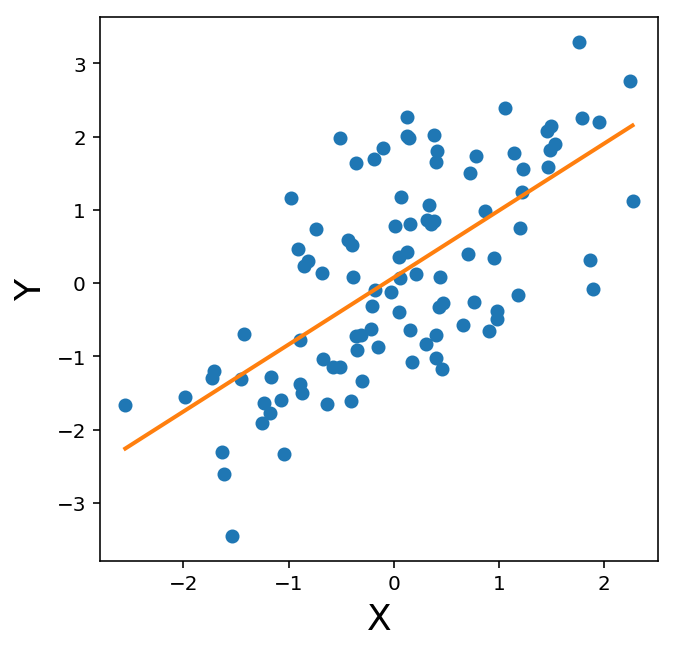

In [86]:
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')

xfit = np.linspace(x.min(), x.max(), 100)
yfit = olsmodel.predict(xfit.reshape(-1,1))  # <-- olsmodel wants xfit as a column vector
plt.plot(xfit, yfit, lw=2);

## <font color=red>Exercises</font>

1. Compute the residuals by subtract the fit from the data.
2. Plot the residuals.
3. Visually, do you think the residuals are correlated or uncorrelated.

## <font color=red>Exercises</font>

1. Compute the $R^2$ value for the OLS model fit. What does this tell you?

## <font color=red>Exercises</font>

1. For the simulated $(x, y)$ data, plot the residual sum of sqaured errors for fits to $y = \beta_1 x$ with slopes between 0 and 2. Use enough points ot make the curve smooth.

---
## A graphical depiction of the OLS model's confidence interval.

## <font color=blue>Learning Objectives:</font>
1. You will be able plot the confidence interval for the linear fit.

In [89]:
x.shape

(100, 1)

In [90]:
x.reshape(-1).shape

(100,)

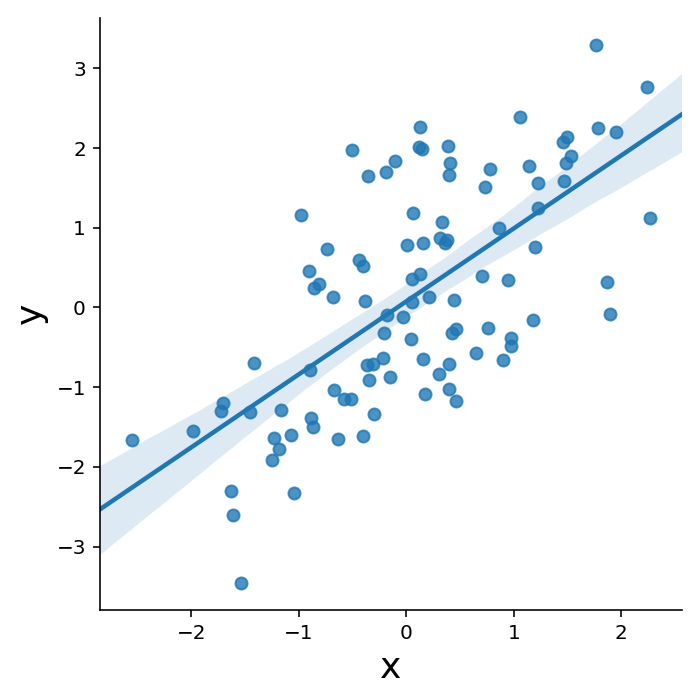

In [91]:
import seaborn as sns

df = pd.DataFrame({'x': x.reshape((-1)), 'y': y})  # x and y must be 1-dimensional arrays
sns.lmplot(x='x', y='y', data=df);

In [98]:
epsilon = y - olsmodel.predict(x)
xfit = np.linspace(x.min(), x.max(), 100)
yfit = olsmodel.predict(xfit.reshape(-1,1))
yfit_ci = np.sqrt( (np.sum((y-y.mean())**2) / (n-2)) * (1/n + (xfit-x.mean())**2 / np.sum((xfit-x.mean())**2)) )
t = st.t.ppf(0.975, n-2)

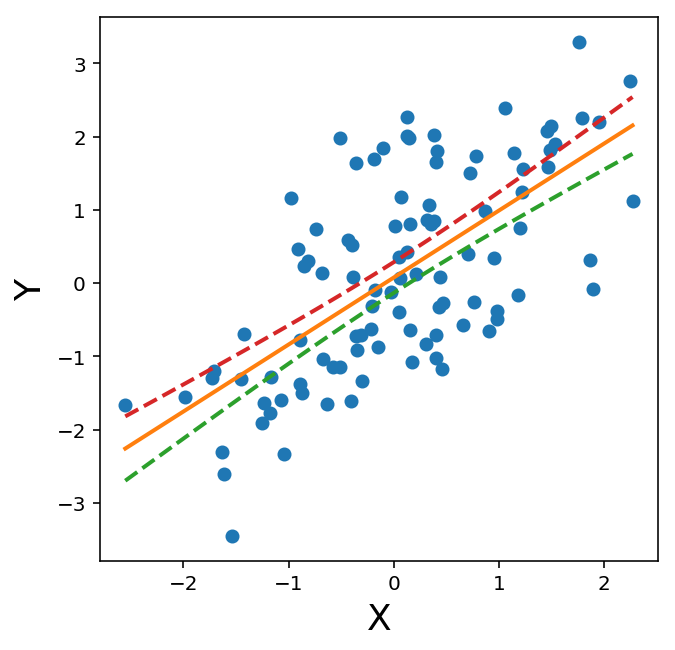

In [99]:
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(xfit, yfit, lw=2);
plt.plot(xfit, yfit - t * se_yfit, '--', lw=2);
plt.plot(xfit, yfit + t * se_yfit, '--', lw=2);

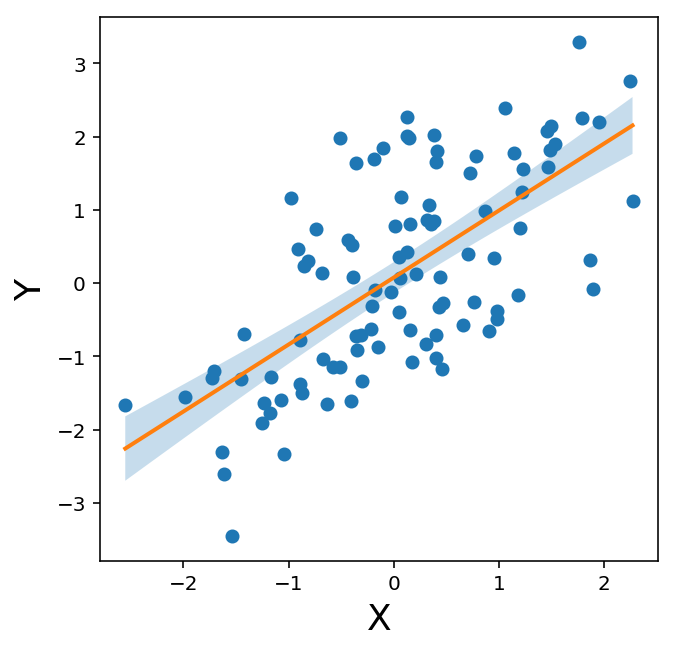

In [102]:
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(xfit, yfit, lw=2);
plt.fill_between(xfit, yfit - t * se_yfit, yfit + t * se_yfit, alpha=0.25);

## <font color=blue>Learning Objectives:</font>
1. You will appreciate how random variation in the sample data gives rise to the shape of the confidence interval envelope.

## <font color=red>Exercises</font>

1. Generate 20 random samples of 100 $(x, y)$ data points using the same generating formula as at the top of this notebook (i.e. use a different random seed each time so you get different data points). For each of these 20 samples fit the sample to an OLS model $y = \beta_1 x$ and store the models in an array.
2. Plot all 20 samples overlaid. On top of these plot all 20 fit lines.
3. How do the fit lines compare to the 95% confidence interval for the original fit line? How do you interpret this?

---
## Bootstrap Confidence Interval

## <font color=blue>Learning Objectives:</font>
1. You will be able to use the bootstrap approach to generate a confidence interval .

In [125]:
slopes = np.zeros((1000,))
yintercepts = np.zeros((1000,))
olsmodel = LinearRegression(fit_intercept=True)
for i in range(1000):
    idx = np.random.choice(np.arange(len(x)), size=len(x), replace=True)
    xi = x[idx]
    yi = y[idx]
    olsmodel.fit(xi, yi)
    slopes[i] = olsmodel.coef_
    yintercepts[i] = olsmodel.intercept_

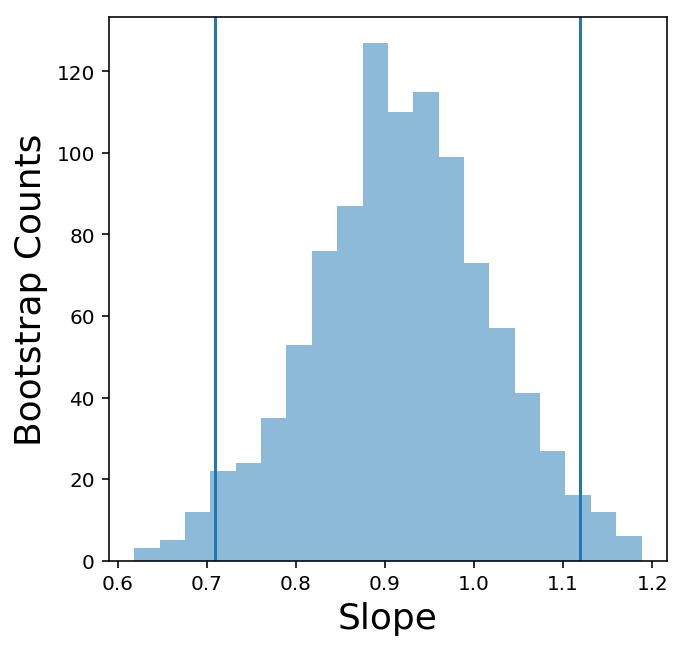

In [126]:
plt.hist(slopes, 20, alpha=0.5)
plt.xlabel('Slope')
plt.ylabel('Bootstrap Counts')

lb, ub = np.quantile(slopes, [0.025, 0.975]);
plt.axvline(lb)
plt.axvline(ub);

## <font color=red>Exercises</font>

1. Plot the histogram and 95% confidence interval for the y-intercept from the above bootstrapped OLS fits.

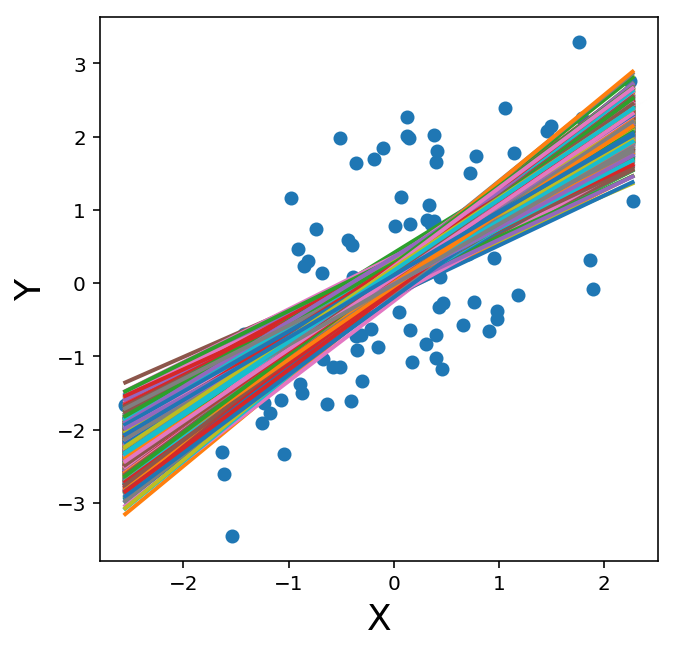

In [128]:
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')

xfit = np.linspace(x.min(), x.max(), 100)
for i in range(len(slopes)):
    yfit = yintercepts[i] + slopes[i] * xfit
    plt.plot(xfit, yfit, lw=2);